# Inspect GLASS models and generate synthetic images

## Imports

In [1]:
import sys
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
root = "/Users/phdenzel/gleam"
sys.path.append(root)
import gleam
from gleam.lensobject import LensObject
from gleam.utils.lensing import LensModel
from gleam.reconsrc import ReconSrc, run_model
from gleam.utils.plotting import kappa_map_plot, kappa_profiles_plot
from gleam.utils.plotting import arrival_time_surface_plot
from gleam.utils.plotting import plot_scalebar, plot_labelbox
import gleam.utils.colors as gcl
gcl.GLEAMcmaps.register_all()


## Load data files

In [2]:
#        ACS          ACS(WFC3)        ACS(WFC3)      WFC3(UNK)
#        ACS(WFC3)    SBC              WFC3           ACS(GAIA)
objs = ['B1608+656', 'DESJ0408-5354', 'HE0435-1223', 'PG1115+080',
        'RXJ0911+0551', 'RXJ1131-1231', 'SDSSJ1004+4112', 'WFIJ2033-4723']
objidx = 7
sigf = 80     #   80,  100,   60,  600,  140, 4000,   80
lens = objs[objidx]
print(lens)


WFIJ2033-4723


In [3]:
fitsdir = 'data/delay_qsos/'
fitsfile = fitsdir + '{}.fits'.format(lens)
print(fitsfile)

jsondir = 'jsons/'
jsonfile = jsondir + '{}.json'.format(lens)
print(jsonfile)


data/delay_qsos/WFIJ2033-4723.fits
jsons/WFIJ2033-4723.json


In [4]:
with open(jsonfile) as f:
    lo = LensObject.from_json(f)
lo.squarify(0)
print(lo.__v__)


Properties of that field are unknown [None]
filename            	WFIJ2033-4723.json
filepath            	/Users/phdenzel/delays/jsons/WFIJ2033-4723.json
band                	
naxis1              	99
naxis2              	99
naxis_plus          	None
refval              	[308.42778206415, -47.392366050694]
refpx               	[147.5, 29.0]
center              	<308.4330, -47.3917>
px2deg              	[3.562500079472852e-05, 3.562500079472817e-05]
px2arcsec           	[0.12825000286102267, 0.1282500028610214]
megacam_range       	None
field               	None
photzp              	None
mag_formula         	<function mag_formula at 0x118617500>
roi                 	ROISelector(99, 99)
lens                	None
srcimgs             	[]
zl                  	0.5
zs                  	3.0
mapr                	6.3484
tdelay              	None
tderr               	None
light_model         	{}
stel_mass           	None
glscfactory         	GLSCFactory(zl, srcimgs, parity, tderr...)
finder        

In [5]:
statedir = 'states/'
statefiles = ['11doubles_dg45.state',
              '11doubles_dg60.state', '11doubles_CMB_dg60.state', '11doubles_SNeIa_dg60.state',
              '7quads_dg45.state', '7quads_CMB_dg45.state', '7quads_SNeIa_dg45.state',
              '7quads_dg60.state', '7quads_CMB_dg60.state', '7quads_SNeIa_dg60.state', 
              'all_dg60.state', 'all_SNeIa_dg60.state']
statefile = statefiles[7]
print(statefile)


7quads_dg60.state


In [6]:
lm = LensModel(statedir+statefile)
lm.obj_idx = objidx
print(lm.__v__)


filename            	7quads_dg60.state
filepath            	states/7quads_dg60.state
N                   	1000
pixrad              	8
maprad              	1.79486428984
pixel_size          	0.0422321009375
kappa               	None
minima              	[[ 0.5946102218550208   1.3532508497390003 ]
 [ 0.30755701130431934 -1.2097242444636473 ]]
saddle_points       	[[ 0.861159631652097   -0.6561216241158678 ]
 [-0.8816634324057222  -0.22554180828982365]]
maxima              	[]
zl                  	0.661
zs                  	1.66
N_obj               	8
N_src               	1
obj_idx             	7
src_idx             	0


## Model plots

### Kappa maps

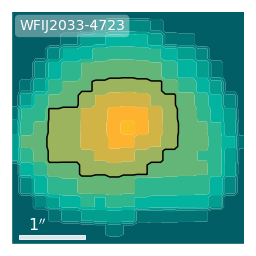

In [7]:
#%%script false
# for i in range(lm.N_obj):
#     lm.obj_idx = i
i = objidx
kappa_map_plot(lm, obj_index=i, extent=lm.extent, contours=True, levels=7, delta=0.1, label=lm.obj_name)
plot_scalebar(R=lm.maprad, length=max(int(lm.maprad/2), 1))
plt.axis('off')
plt.gcf().axes[0].get_xaxis().set_visible(False)
plt.gcf().axes[0].get_yaxis().set_visible(False)
# plt.savefig('results/{}_kappa.pdf'.format(lm.obj_name), transparent=True, bbox_inches='tight', pad_inches=0)
# plt.close()
plt.show()


### Kappa profiles

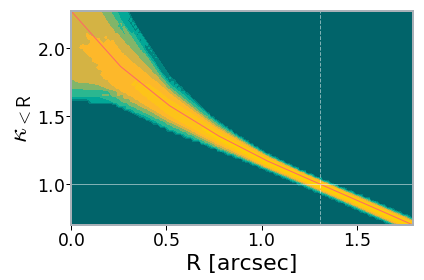

In [8]:
#%%script false
# for i in range(lm.N_obj):
#     lm.obj_idx = i
i = objidx
kappa_profiles_plot(lm, obj_index=i, ensemble_average=True, refined=True, interpolate=150, levels=10,
                    as_range=True, maprad=lm.maprad, pixrad=lm.pixrad,
                    adjust_limits=True, annotation_color='white', label_axes=True, fontsize=22)
plt.tight_layout()
# plt.savefig('results/{}_profiles.pdf'.format(lm.obj_name), transparent=True, bbox_inches='tight', pad_inches=0)
# plt.close()
plt.show()


### Arrvial time surfaces

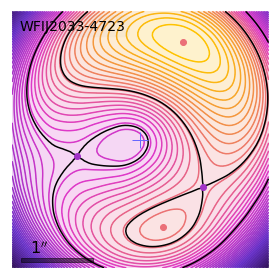

In [9]:
#%%script false
# for i in range(lm.N_obj):
#     lm.obj_idx = i
arrival_time_surface_plot(lm, obj_index=i, draw_images=True,
                          contours=True, levels=60, min_contour_shift=None,
                          sad_contour_shift=None, scalebar=False, label=lm.obj_name, color='black')
plt.plot(0, 0, color=gcl.blue, marker='+', markersize=16)
plot_scalebar(R=lm.maprad, length=max(int(lm.maprad/2), 1), color='black')
plt.axis('off')
plt.gcf().axes[0].get_xaxis().set_visible(False)
plt.gcf().axes[0].get_yaxis().set_visible(False)
plt.tight_layout()
# plt.savefig('results/{}_arriv.pdf'.format(lm.obj_name), transparent=True, bbox_inches='tight', pad_inches=0)
# plt.close()
plt.show()


### Hubble constant

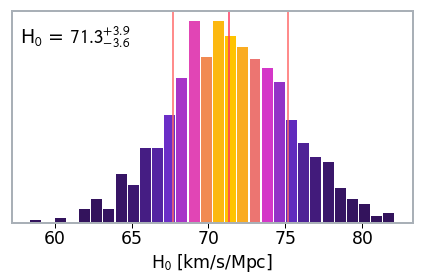

In [10]:
#%%script false
q = np.percentile(lm.H0, [16, 50, 84])
n, bins, patches = plt.hist(lm.H0, bins=30, density=True, rwidth=0.901)
cm = plt.cm.get_cmap('phoenix')
plt.axvline(q[1], color=gcl.pink)
plt.axvline(q[0], color=gcl.red)
plt.axvline(q[2], color=gcl.red)

# add gaussian color scheme to pdf
bin_centers = 0.5 * (bins[:-1] + bins[1:])
x = np.exp(-(bin_centers - q[1])**2/np.mean(np.diff(q))**2)
x = x/x.max()
for c, p in zip(x, patches):
    plt.setp(p, 'facecolor', cm(c))
plt.rcParams['mathtext.fontset'] = 'stixsans'
Hstr = 'H$_0$ = ${:5.1f}^{{{:+4.1f}}}_{{{:+4.1f}}}$'
plt.text(0.02, 0.85, Hstr.format(q[1], np.diff(q)[1], -np.diff(q)[0]), fontsize=19, color='black', transform=plt.gca().transAxes)

plt.gcf().axes[0].get_yaxis().set_visible(False)
plt.xlabel('H$_0$ [km/s/Mpc]')
plt.tight_layout()
# plt.savefig('results/H0hist_{}.pdf'.format(statefile.replace('.state', '')), transparent=True, bbox_inches='tight', pad_inches=0)
plt.show()


## Source reconstruction

In [11]:
# lo.data = np.fliplr(lo.data)
reconsrc = ReconSrc(lo, lm, M=60, M_fullres=400, mask_keys=['circle'])
reconsrc.chmdl(-1)
# reconsrc.rotation = reconsrc.lensobject.hdr['ORIENTAT']
sig2 = sigf * np.abs(reconsrc.lensobject.data)
sig2[sig2 == 0] = sig2[sig2 != 0].min()

print reconsrc.lensobject.data.shape


(99, 99)


In [12]:
reconsrc.calc_psf("psf/tinytim_ACS.fits", normalize=True, window_size=8, verbose=True)
# reconsrc.calc_psf("psf/tinytim_SBC.fits", normalize=True, window_size=8, verbose=True)
# reconsrc.calc_psf("psf/tinytim_WFC3.fits", normalize=True, window_size=8, verbose=True)


PSF: P_kl(9801, 9801)
Sum: 0.994691434185


<9801x9801 sparse matrix of type '<type 'numpy.float64'>'
	with 2595321 stored elements in Compressed Sparse Row format>

In [13]:
kw = dict(method='lsqr', use_psf=True, use_mask=True, use_filter=False, sigma2=sig2.copy(), # nonzero_only=True, within_radius=0.8
          cached=True, from_cache=False, save_to_cache=False)

Mij = reconsrc.inv_proj_matrix(use_mask=True, r_max=2)


In [14]:
%%script false
dbeta, xy, r_max, r_fullres = reconsrc.inv_proj_matrix(use_mask=True, return_props=True)

plt.hist2d(xy[:, 0], xy[:, 1])
plt.show()


In [15]:
dij = reconsrc.lens_map(mask=True)
print("Calculating source plane...")
srcplane = reconsrc.d_p(method=kw['method'], flat=False, iter_lim=10000,
                        use_psf=kw['use_psf'], use_mask=kw['use_mask'], use_filter=kw['use_filter'],
                        sigma2=kw['sigma2'], cached=kw['cached'])
print("Calculating synthetic...")
synth = reconsrc.reproj_map(**kw)
# print("Calculating residuals...")
# resids = reconsrc.residual_map(**kw)
# print("Calculating chi2...")
# chi2 = reconsrc.reproj_chi2(reduced=False, **kw)
print(reconsrc.__v__)


Calculating source plane...
Calculating synthetic...
lensobject          	LensObject(@[308.4330, -47.3917])
model               	<LensModel@7quads_dg60>
mask_keys           	['circle']
M                   	60
N                   	121
r_max               	2.0
M_fullres           	262
N_fullres           	525
r_fullres           	8.73105913332
N_nil               	8106
rotation            	0


In [16]:
print "dij:      \t{}".format(dij.shape)
print "Mij:      \t{}".format(Mij.shape)
print "dp:       \t{}".format(srcplane.shape)
# print "chi2:     \t{:6.4f}".format(chi2)
print "r_max:    \t{:6.4f}".format(reconsrc.r_max)
print "r_fullres \t{:6.4f}".format(reconsrc.r_fullres)
print "src pxl:  \t{:6.4f}".format(reconsrc.src_pxscale)
print "maprad    \t{:6.4f}".format(reconsrc.lensobject.mapr)
print "lens pxl: \t{:6.4f}".format(reconsrc.lensobject.px2arcsec[0])
sbf = (reconsrc.lensobject.px2arcsec[0]/reconsrc.src_pxscale)**2
print "SB scale factor: {:7.4f}".format(sbf)


dij:      	(99, 99)
Mij:      	(9801, 14641)
dp:       	(121, 121)
r_max:    	2.0000
r_fullres 	8.7311
src pxl:  	0.0331
maprad    	6.3484
lens pxl: 	0.1283
SB scale factor: 15.0510


In [17]:
# Test flat dij with mask
flat_dij = reconsrc.d_ij(mask=True)
print flat_dij.shape
flat_dij = flat_dij.reshape(int(np.sqrt(flat_dij.shape[0])), int(np.sqrt(flat_dij.shape[0])))
print flat_dij.shape

(9801,)
(99, 99)


In [33]:
plt_kw = dict(origin='lower', cmap='gravic', interpolation='bicubic', vmin=0)
lvmax = 0.1000 * np.max(dij)     # 0.2500, 0.0075, 0.0075, 0.0750, 0.0750, 0.0100, 0.0100,  0.1000
svmax = sbf/4  * lvmax           # /4,     /1,     /1,     /16     /sbf    /2      **(-1)  /16

print "lvmax: {}".format(lvmax)
print "svmax: {}".format(svmax)

lvmax: 17.8524658203
svmax: 67.1743919323


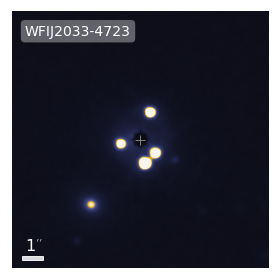

In [34]:
plt.imshow(dij, extent=reconsrc.extent, vmax=lvmax, **plt_kw)
# # labels and annotations
plot_scalebar(R=reconsrc.lensobject.mapr, length=1)
plot_labelbox(lens, position='top left')

# # force mask
# m = reconsrc.image_mask()
# m = reconsrc.mask
# msk = np.zeros(m.shape + (4,))
# msk[:, :, 3] = m
# plt.imshow(msk, origin='lower', extent=lo.extent)

# mask cross
c = reconsrc.lensobject.roi.buffer.center
c = (c - reconsrc.lensobject.center.xy) * reconsrc.lensobject.px2arcsec[0]
plt.plot(*c, marker='+', markersize=10, color='grey')

plt.axis('off')
plt.gcf().axes[0].get_xaxis().set_visible(False)
plt.gcf().axes[0].get_yaxis().set_visible(False)
plt.tight_layout()
plt.savefig("results/{}_data.pdf".format(lens), transparent=True, bbox_inches='tight', pad_inches=0)
plt.show()


### Source plane

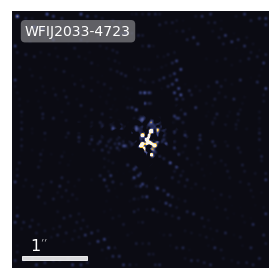

In [35]:
plt.imshow(srcplane, extent=reconsrc.src_extent, vmax=1*svmax,
           **plt_kw)

# labels and annotations
plot_scalebar(R=reconsrc.r_max, length=1)
plot_labelbox(lens, position='top left')

plt.axis('off')
plt.gcf().axes[0].get_xaxis().set_visible(False)
plt.gcf().axes[0].get_yaxis().set_visible(False)
plt.tight_layout()
plt.savefig("results/{}_src.pdf".format(lens), transparent=True, bbox_inches='tight', pad_inches=0)
plt.show()


### Synthetic image

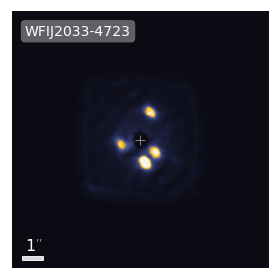

In [36]:
plt.imshow(synth, extent=reconsrc.extent, vmax=1*lvmax, **plt_kw)

# labels and annotations
plot_scalebar(R=reconsrc.lensobject.mapr, length=1)
plot_labelbox(lens, position='top left')

# # force mask
# m = reconsrc.image_mask()
# m = reconsrc.mask
# msk = np.zeros(m.shape + (4,))
# msk[:, :, 3] = m
# plt.imshow(msk, origin='lower', extent=lo.extent)

# mask cross
c = reconsrc.lensobject.roi.buffer.center
c = (c - reconsrc.lensobject.center.xy) * reconsrc.lensobject.px2arcsec[0]
plt.plot(*c, marker='+', markersize=10, color='grey')

plt.axis('off')
plt.gcf().axes[0].get_xaxis().set_visible(False)
plt.gcf().axes[0].get_yaxis().set_visible(False)
plt.tight_layout()
plt.savefig("results/{}_synth.pdf".format(lens), transparent=True, bbox_inches='tight', pad_inches=0)
plt.show()


### Residual image

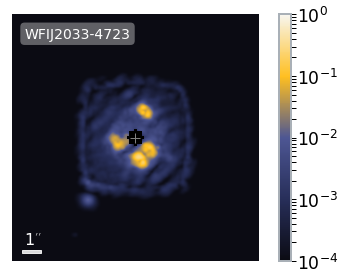

In [37]:
kw = plt_kw.copy()
kw.pop('cmap')
kw.pop('vmin')
# rmap = resids

f1, f2 = 1, 1
rmap = (f1*dij/dij.max() - f2*synth/synth.max())**2
rmap[rmap == 0] = rmap[rmap != 0].min()
rmap[rmap < 1e-4] = 1e-4
# print dij.min(), dij.max(), synth.min(), synth.max()
# print rmap


plt.imshow(rmap, extent=reconsrc.extent, cmap='gravic',
           norm=mpl.colors.LogNorm(vmin=1e-4, vmax=1e0), **kw)

# labels and annotations
plot_scalebar(R=reconsrc.lensobject.mapr, length=1)
plot_labelbox(lens, position='top left')
plt.colorbar()

# force mask
# m = reconsrc.image_mask()
m = reconsrc.mask
msk = np.zeros(m.shape + (4,))
msk[:, :, 3] = m
plt.imshow(msk, origin='lower', extent=lo.extent)

# mask cross
c = reconsrc.lensobject.roi.buffer.center
c = (c - reconsrc.lensobject.center.xy) * reconsrc.lensobject.px2arcsec[0]
plt.plot(*c, marker='+', markersize=10, color='grey')

plt.axis('off')
plt.gcf().axes[0].get_xaxis().set_visible(False)
plt.gcf().axes[0].get_yaxis().set_visible(False)
plt.tight_layout()
plt.savefig("results/{}_resids.pdf".format(lens), transparent=True, bbox_inches='tight')
plt.show()